In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from zipfile import ZipFile
from io import BytesIO
import os
import sys
import glob
import wandb
import torch

# Image manipulation.
import PIL.Image
from IPython.display import Image, clear_output, display

In [ ]:
def load_image_blackandwhite(filename):
    #image = PIL.Image.open(filename)

    image = PIL.Image.open(filename) # open colour image
    image = image.convert('L') # convert image to black and white
    image = np.array(image)

    return np.float32(image)

In [ ]:
def plot_image(image):
    # Assume the pixel-values are scaled between 0 and 255.

    # Convert the pixel-values to the range between 0.0 and 1.0
    image = np.clip(image/255.0, 0.0, 1.0)

    # Plot using matplotlib.
    plt.imshow(image, interpolation='lanczos')
    plt.show()

In [ ]:
def reshape_image(image_file, new_wigth, new_height):

    ############
    # Reduce Size of Image
    ############

    olddim = np.shape(image_file)
    img = np.zeros((new_wigth,new_height))
    newdim = np.shape(img)

    for r in range(newdim[0]):
        if (newdim[0] <= olddim[0]):
            centerx=(r)/newdim[0]*olddim[0]
            lowerx=max(0,int(round(centerx-olddim[0]/newdim[0]/2,0)))
            upperx=min(olddim[0],int(round(centerx+olddim[0]/newdim[0]/2,0))+1)
        else:
            lowerx=max(0,int(r*olddim[0]/newdim[0]))
            upperx=min(lowerx+1,olddim[0]-1)+1

        for c in range(newdim[1]):
            if (newdim[1] <= olddim[1]):
                centery=(c)/newdim[1]*olddim[1]
                lowery=max(0,int(round(centery-olddim[1]/newdim[1]/2,0)))
                uppery=min(olddim[1],int(round(centery+olddim[1]/newdim[1]/2,0))+1)
            else:
                lowery=max(0,int(c*olddim[1]/newdim[1]))
                uppery=min(lowery+1,olddim[1]-1)+1
            img[r,c] = np.mean(image_file[ lowerx:upperx, lowery:uppery ])


    return img

In [ ]:
archive = ZipFile("TanamanHias.v1i.folder.zip", 'r')
archive.namelist()[0:10]

['README.dataset.txt',
 'README.roboflow.txt',
 'test/',
 'test/Black Spot/',
 'test/Black Spot/Black-Spot-109-_jpg.rf.b670def2942b05ae2cca240483abe501.jpg',
 'test/Black Spot/Black-Spot-110-_jpg.rf.d9df3de704abfac5949f6f50bff922b5.jpg',
 'test/Black Spot/Black-Spot-118-_jpg.rf.b641a0a68d05b429b1d2f102b8b97619.jpg',
 'test/Black Spot/Black-Spot-122-_jpg.rf.78b1c52ac6e549390e0ecd308d492d71.jpg',
 'test/Black Spot/Black-Spot-125-_jpg.rf.38ff7d085cd133e439ac2ef9a9208418.jpg',
 'test/Black Spot/Black-Spot-133-_jpg.rf.795a1160efa0e9e006aec9145f012a6b.jpg']

In [ ]:
['test/',
 'test/Black Spot/',
 'test/Black Spot/Black-Spot-109-_jpg.rf.b670def2942b05ae2cca240483abe501.jpg',
 'test/Black Spot/Black-Spot-110-_jpg.rf.d9df3de704abfac5949f6f50bff922b5.jpg',
 'test/Black Spot/Black-Spot-118-_jpg.rf.b641a0a68d05b429b1d2f102b8b97619.jpg',
 'test/Black Spot/Black-Spot-122-_jpg.rf.78b1c52ac6e549390e0ecd308d492d71.jpg',
 'test/Black Spot/Black-Spot-125-_jpg.rf.38ff7d085cd133e439ac2ef9a9208418.jpg',
 'test/Black Spot/Black-Spot-133-_jpg.rf.795a1160efa0e9e006aec9145f012a6b.jpg']

['test/',
 'test/Black Spot/',
 'test/Black Spot/Black-Spot-109-_jpg.rf.b670def2942b05ae2cca240483abe501.jpg',
 'test/Black Spot/Black-Spot-110-_jpg.rf.d9df3de704abfac5949f6f50bff922b5.jpg',
 'test/Black Spot/Black-Spot-118-_jpg.rf.b641a0a68d05b429b1d2f102b8b97619.jpg',
 'test/Black Spot/Black-Spot-122-_jpg.rf.78b1c52ac6e549390e0ecd308d492d71.jpg',
 'test/Black Spot/Black-Spot-125-_jpg.rf.38ff7d085cd133e439ac2ef9a9208418.jpg',
 'test/Black Spot/Black-Spot-133-_jpg.rf.795a1160efa0e9e006aec9145f012a6b.jpg']

In [ ]:
image = load_image_blackandwhite(filename=BytesIO(archive.read(archive.namelist()[200])))
image.shape

(640, 640)

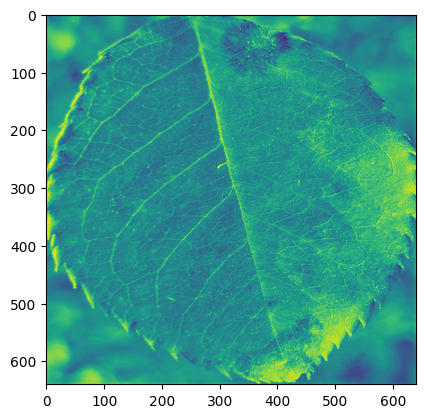

In [ ]:
plot_image(image)